In [1]:
import librosa
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
audio_path='UrbanSound8K/100263-2-0-3.wav'
librosa_audio_data,librosa_sample_rate=librosa.load(audio_path)

In [3]:
librosa_audio_data  #data will be monochannel
#librosa data will be from -1 to 1
#samplerate will be 21khz

array([ 0.00331575,  0.00467553,  0.00361099, ..., -0.00376796,
       -0.00347471, -0.00357828], dtype=float32)

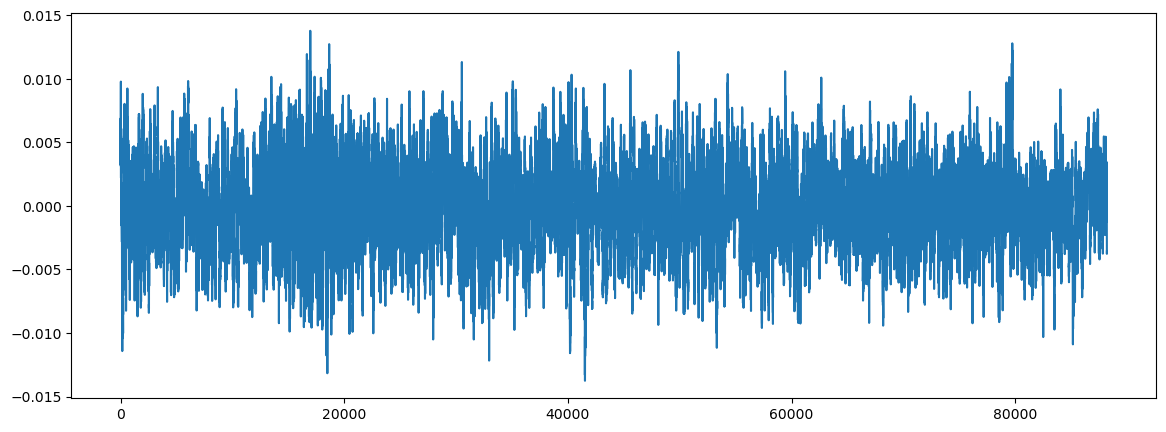

In [4]:
plt.figure(figsize=(14,5))
plt.plot(librosa_audio_data)

In [5]:
from scipy.io import wavfile as wav
wav_sample_rate,wav_audio=wav.read(audio_path)
wav_audio

array([[ 194,  100],
       [ 179,  113],
       [ 160,  124],
       ...,
       [-143,  -87],
       [-134,  -91],
       [-110,  -98]], dtype=int16)

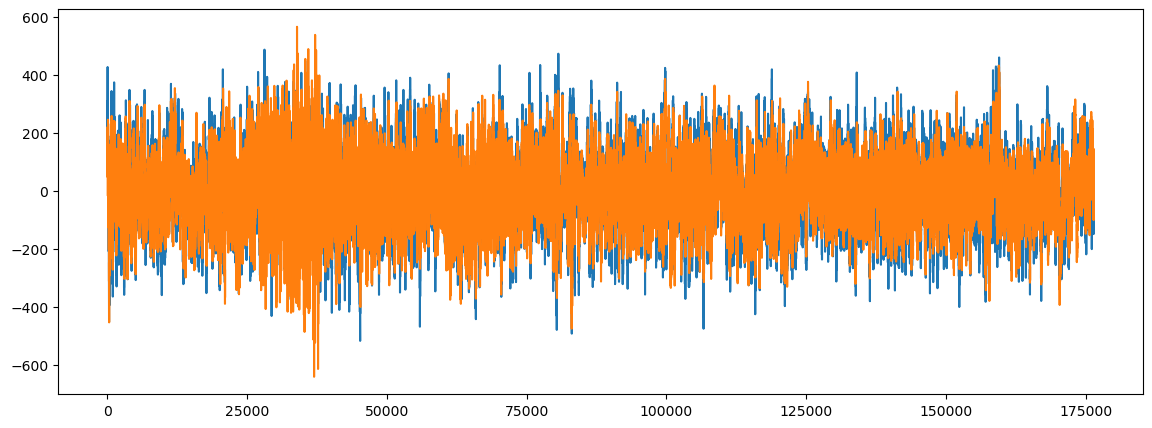

In [6]:
plt.figure(figsize=(14,5))
plt.plot(wav_audio)

In [7]:
mfccs=librosa.feature.mfcc(y=librosa_audio_data,sr=librosa_sample_rate,n_mfcc=40)
print(mfccs.shape)

(40, 173)


In [8]:
mfccs

array([[-4.7486273e+02, -4.5088608e+02, -4.4905338e+02, ...,
        -4.7676157e+02, -4.7334869e+02, -4.9085260e+02],
       [ 1.1530264e+02,  1.1144249e+02,  1.1125224e+02, ...,
         1.1112500e+02,  1.1057970e+02,  1.0299150e+02],
       [-1.8326149e+01, -2.4682453e+01, -3.0259779e+01, ...,
        -8.2357616e+00, -9.0665359e+00, -4.5019574e+00],
       ...,
       [-2.8760443e+00, -3.2479763e+00, -4.8965521e+00, ...,
        -5.2023673e-01,  3.5672522e+00,  7.4937577e+00],
       [-4.2968369e-01, -5.8838767e-01, -8.1724268e-01, ...,
         1.8340671e-01,  7.6732349e-01,  2.7120023e+00],
       [-1.1780636e+00,  6.9809473e-01,  6.3521624e+00, ...,
        -2.6221929e+00, -4.7912703e+00, -3.1826310e+00]], dtype=float32)

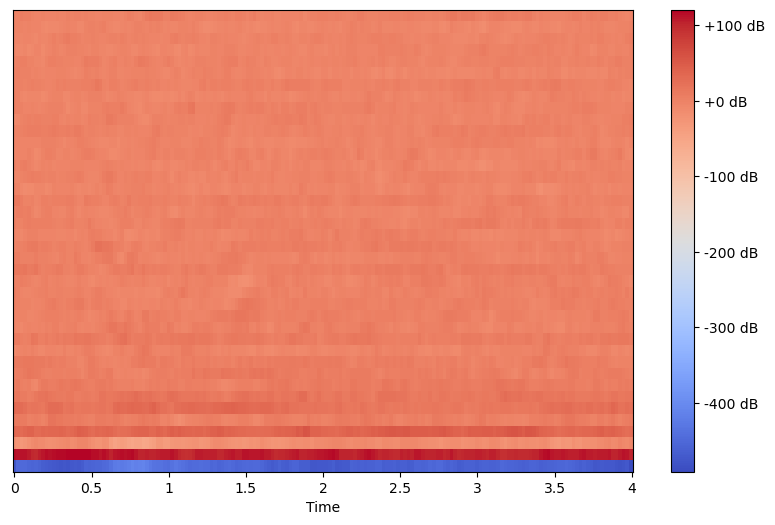

In [9]:
plt.figure(figsize=(10, 6))
librosa.display.specshow(mfccs, x_axis='time', sr=librosa_sample_rate)
plt.colorbar(format='%+2.0f dB')

In [10]:
import pandas as pd
import os
audio_dataset_path='UrbanSound8K/audio/'
metadata=pd.read_csv('UrbanSound8K/metadata/UrbanSound8K.csv')
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [11]:
def feature_extractor(file):
    audio,sample_rate=librosa.load(file_name,res_type='kaiser_fast')
    mfccs_features=librosa.feature.mfcc(y=audio,sr=sample_rate,n_mfcc=40)
    mfccs_scaled_features=np.mean(mfccs_features.T,axis=0)
    return mfccs_scaled_features

In [12]:
import resampy
import numpy as np
from tqdm import tqdm
extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    final_class_labels=row["class"]
    data=feature_extractor(file_name)
    extracted_features.append([data,final_class_labels])

3554it [02:41, 21.66it/s]D:\anaconda\Lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1323
  warnings.warn(
8324it [06:05, 30.60it/s]D:\anaconda\Lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1103
  warnings.warn(
D:\anaconda\Lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1523
  warnings.warn(
8732it [06:21, 22.90it/s]


In [13]:
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[-217.35526, 70.22339, -130.38527, -53.282898,...",dog_bark
1,"[-424.09818, 109.34077, -52.919525, 60.86475, ...",children_playing
2,"[-458.79114, 121.38419, -46.520657, 52.00812, ...",children_playing
3,"[-413.89984, 101.66373, -35.42945, 53.036358, ...",children_playing
4,"[-446.60352, 113.68541, -52.402206, 60.302044,...",children_playing


In [14]:
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [15]:
X.shape

(8732, 40)

In [16]:
y

array(['dog_bark', 'children_playing', 'children_playing', ...,
       'car_horn', 'car_horn', 'car_horn'], dtype='<U16')

In [17]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [20]:
X_train.shape

(6985, 40)

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [22]:
num_labels=y.shape[1]
num_labels

10

In [23]:
model=Sequential()
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
#second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
#third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))
#last layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

D:\anaconda\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 100)                 │           4,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 200)                 │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 100)                 │          20,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,010 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 10)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 45,410 (177.38 KB)

 Trainable params: 45,410 (177.38 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [28]:
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime

num_epochs = 200
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classificationV1.keras', 
                               verbose=1, save_best_only=True)
start=datetime.now()
model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/200
184/219 ━━━━━━━━━━━━━━━━━━━━ 0s 822us/step - accuracy: 0.7109 - loss: 0.8861
Epoch 1: val_loss improved from inf to 0.69347, saving model to saved_models/audio_classificationV1.keras
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7111 - loss: 0.8861 - val_accuracy: 0.7802 - val_loss: 0.6935
Epoch 2/200
183/219 ━━━━━━━━━━━━━━━━━━━━ 0s 827us/step - accuracy: 0.7104 - loss: 0.8986
Epoch 2: val_loss did not improve from 0.69347
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7112 - loss: 0.8976 - val_accuracy: 0.7842 - val_loss: 0.7158
Epoch 3/200
184/219 ━━━━━━━━━━━━━━━━━━━━ 0s 823us/step - accuracy: 0.7116 - loss: 0.8734
Epoch 3: val_loss did not improve from 0.69347
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7118 - loss: 0.8746 - val_accuracy: 0.7705 - val_loss: 0.7134
Epoch 4/200
185/219 ━━━━━━━━━━━━━━━━━━━━ 0s 818us/step - accuracy: 0.6917 - loss: 0.9260
Epoch 4: val_loss did not improve from 0.69347
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - acc

213/219 ━━━━━━━━━━━━━━━━━━━━ 0s 952us/step - accuracy: 0.7065 - loss: 0.8617
Epoch 26: val_loss did not improve from 0.68456
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7066 - loss: 0.8620 - val_accuracy: 0.7705 - val_loss: 0.7305
Epoch 27/200
184/219 ━━━━━━━━━━━━━━━━━━━━ 0s 823us/step - accuracy: 0.7108 - loss: 0.8789
Epoch 27: val_loss did not improve from 0.68456
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7108 - loss: 0.8782 - val_accuracy: 0.7939 - val_loss: 0.6854
Epoch 28/200
182/219 ━━━━━━━━━━━━━━━━━━━━ 0s 831us/step - accuracy: 0.7148 - loss: 0.8570
Epoch 28: val_loss did not improve from 0.68456
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7147 - loss: 0.8583 - val_accuracy: 0.7899 - val_loss: 0.7070
Epoch 29/200
186/219 ━━━━━━━━━━━━━━━━━━━━ 0s 816us/step - accuracy: 0.7311 - loss: 0.8320
Epoch 29: val_loss did not improve from 0.68456
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7301 - loss: 0.8354 - val_accuracy: 0.7773 - val_loss: 

183/219 ━━━━━━━━━━━━━━━━━━━━ 0s 825us/step - accuracy: 0.7193 - loss: 0.8532
Epoch 51: val_loss did not improve from 0.67412
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7184 - loss: 0.8553 - val_accuracy: 0.7888 - val_loss: 0.6921
Epoch 52/200
183/219 ━━━━━━━━━━━━━━━━━━━━ 0s 826us/step - accuracy: 0.7159 - loss: 0.8463
Epoch 52: val_loss did not improve from 0.67412
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7155 - loss: 0.8494 - val_accuracy: 0.7899 - val_loss: 0.7254
Epoch 53/200
183/219 ━━━━━━━━━━━━━━━━━━━━ 0s 825us/step - accuracy: 0.7144 - loss: 0.8554
Epoch 53: val_loss did not improve from 0.67412
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7146 - loss: 0.8573 - val_accuracy: 0.7745 - val_loss: 0.7251
Epoch 54/200
182/219 ━━━━━━━━━━━━━━━━━━━━ 0s 829us/step - accuracy: 0.7160 - loss: 0.8632
Epoch 54: val_loss did not improve from 0.67412
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7153 - loss: 0.8632 - val_accuracy: 0.7882 - val_loss: 

219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7127 - loss: 0.8706 - val_accuracy: 0.7876 - val_loss: 0.7193
Epoch 77/200
184/219 ━━━━━━━━━━━━━━━━━━━━ 0s 823us/step - accuracy: 0.7112 - loss: 0.8830
Epoch 77: val_loss did not improve from 0.67412
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7123 - loss: 0.8789 - val_accuracy: 0.7836 - val_loss: 0.7048
Epoch 78/200
183/219 ━━━━━━━━━━━━━━━━━━━━ 0s 826us/step - accuracy: 0.7136 - loss: 0.8804
Epoch 78: val_loss did not improve from 0.67412
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7147 - loss: 0.8783 - val_accuracy: 0.7808 - val_loss: 0.6989
Epoch 79/200
184/219 ━━━━━━━━━━━━━━━━━━━━ 0s 822us/step - accuracy: 0.7259 - loss: 0.8656
Epoch 79: val_loss did not improve from 0.67412
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7255 - loss: 0.8658 - val_accuracy: 0.7808 - val_loss: 0.7250
Epoch 80/200
184/219 ━━━━━━━━━━━━━━━━━━━━ 0s 822us/step - accuracy: 0.7378 - loss: 0.8384
Epoch 80: val_loss did not i

Epoch 102/200
211/219 ━━━━━━━━━━━━━━━━━━━━ 0s 962us/step - accuracy: 0.7254 - loss: 0.8289
Epoch 102: val_loss did not improve from 0.67412
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7254 - loss: 0.8296 - val_accuracy: 0.7882 - val_loss: 0.6854
Epoch 103/200
185/219 ━━━━━━━━━━━━━━━━━━━━ 0s 822us/step - accuracy: 0.7353 - loss: 0.8331
Epoch 103: val_loss improved from 0.67412 to 0.67111, saving model to saved_models/audio_classificationV1.keras
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7339 - loss: 0.8348 - val_accuracy: 0.7979 - val_loss: 0.6711
Epoch 104/200
178/219 ━━━━━━━━━━━━━━━━━━━━ 0s 851us/step - accuracy: 0.7264 - loss: 0.8430
Epoch 104: val_loss did not improve from 0.67111
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7254 - loss: 0.8444 - val_accuracy: 0.7819 - val_loss: 0.7021
Epoch 105/200
179/219 ━━━━━━━━━━━━━━━━━━━━ 0s 846us/step - accuracy: 0.7166 - loss: 0.8493
Epoch 105: val_loss improved from 0.67111 to 0.67004, saving model to saved

Epoch 127/200
185/219 ━━━━━━━━━━━━━━━━━━━━ 0s 818us/step - accuracy: 0.7172 - loss: 0.8676
Epoch 127: val_loss improved from 0.67004 to 0.65445, saving model to saved_models/audio_classificationV1.keras
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7173 - loss: 0.8668 - val_accuracy: 0.8025 - val_loss: 0.6544
Epoch 128/200
172/219 ━━━━━━━━━━━━━━━━━━━━ 0s 882us/step - accuracy: 0.7274 - loss: 0.8311
Epoch 128: val_loss did not improve from 0.65445
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7277 - loss: 0.8315 - val_accuracy: 0.7968 - val_loss: 0.6862
Epoch 129/200
169/219 ━━━━━━━━━━━━━━━━━━━━ 0s 898us/step - accuracy: 0.7269 - loss: 0.8136
Epoch 129: val_loss did not improve from 0.65445
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7245 - loss: 0.8226 - val_accuracy: 0.7934 - val_loss: 0.6892
Epoch 130/200
171/219 ━━━━━━━━━━━━━━━━━━━━ 0s 886us/step - accuracy: 0.7243 - loss: 0.8746
Epoch 130: val_loss did not improve from 0.65445
219/219 ━━━━━━━━━━━━━━━━━━

185/219 ━━━━━━━━━━━━━━━━━━━━ 0s 818us/step - accuracy: 0.7315 - loss: 0.7980
Epoch 152: val_loss did not improve from 0.65445
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7314 - loss: 0.8004 - val_accuracy: 0.7922 - val_loss: 0.6884
Epoch 153/200
187/219 ━━━━━━━━━━━━━━━━━━━━ 0s 810us/step - accuracy: 0.7318 - loss: 0.8085
Epoch 153: val_loss did not improve from 0.65445
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7315 - loss: 0.8095 - val_accuracy: 0.7853 - val_loss: 0.6785
Epoch 154/200
185/219 ━━━━━━━━━━━━━━━━━━━━ 0s 819us/step - accuracy: 0.7210 - loss: 0.8463
Epoch 154: val_loss did not improve from 0.65445
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7208 - loss: 0.8478 - val_accuracy: 0.7962 - val_loss: 0.6859
Epoch 155/200
185/219 ━━━━━━━━━━━━━━━━━━━━ 0s 819us/step - accuracy: 0.7347 - loss: 0.8113
Epoch 155: val_loss did not improve from 0.65445
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7342 - loss: 0.8122 - val_accuracy: 0.8014 - val

Epoch 177/200
183/219 ━━━━━━━━━━━━━━━━━━━━ 0s 826us/step - accuracy: 0.7306 - loss: 0.8013
Epoch 177: val_loss did not improve from 0.64493
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7305 - loss: 0.8032 - val_accuracy: 0.7876 - val_loss: 0.7045
Epoch 178/200
183/219 ━━━━━━━━━━━━━━━━━━━━ 0s 828us/step - accuracy: 0.7228 - loss: 0.8701
Epoch 178: val_loss did not improve from 0.64493
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7236 - loss: 0.8662 - val_accuracy: 0.7951 - val_loss: 0.6727
Epoch 179/200
178/219 ━━━━━━━━━━━━━━━━━━━━ 0s 851us/step - accuracy: 0.7288 - loss: 0.8157
Epoch 179: val_loss did not improve from 0.64493
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7284 - loss: 0.8189 - val_accuracy: 0.7882 - val_loss: 0.6897
Epoch 180/200
170/219 ━━━━━━━━━━━━━━━━━━━━ 0s 892us/step - accuracy: 0.7353 - loss: 0.8163
Epoch 180: val_loss did not improve from 0.64493
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7347 - loss: 0.8185 - val_accuracy

In [29]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.7939324378967285


In [34]:
filename='UrbanSound8K/ytsoundchildren.mp3'

In [35]:
audio, sample_rate = librosa.load(filename, res_type='kaiser_fast') 
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
print(mfccs_scaled_features)
mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
print(mfccs_scaled_features)
print(mfccs_scaled_features.shape)
predicted_label = np.argmax(model.predict(mfccs_scaled_features), axis=-1)
print(predicted_label)
prediction_class = labelencoder.inverse_transform(predicted_label) 
prediction_class

[-2.5296397e+02  7.9073357e+01 -9.7182121e+01  2.3250528e+01
 -2.9857635e+01  2.8424892e+00 -6.9179206e+00  6.9737417e-01
 -1.3098591e+01 -7.3466716e+00 -1.5333414e+00  7.3902345e-01
  1.1004635e+00 -1.2034578e+01 -2.1906393e+01  1.4668914e+01
 -1.7279570e+01  5.1646197e-01 -9.9716072e+00 -5.2297635e+00
 -9.7649651e+00  4.9824324e-01 -1.1989742e+01  3.7049448e+00
  3.3590024e+00 -8.6492234e-01  5.4751575e-01 -3.1528068e-01
 -8.5621939e+00  1.0352017e+00 -3.4793899e+00 -3.9716177e+00
  1.0993753e-01 -1.6673636e+00 -2.8753088e+00 -4.5952687e+00
 -1.1684322e+00 -2.9631953e+00 -1.8203275e+00  1.1958104e+00]
[[-2.5296397e+02  7.9073357e+01 -9.7182121e+01  2.3250528e+01
  -2.9857635e+01  2.8424892e+00 -6.9179206e+00  6.9737417e-01
  -1.3098591e+01 -7.3466716e+00 -1.5333414e+00  7.3902345e-01
   1.1004635e+00 -1.2034578e+01 -2.1906393e+01  1.4668914e+01
  -1.7279570e+01  5.1646197e-01 -9.9716072e+00 -5.2297635e+00
  -9.7649651e+00  4.9824324e-01 -1.1989742e+01  3.7049448e+00
   3.3590024e+00 

array(['children_playing'], dtype='<U16')

In [30]:
from sklearn.metrics import confusion_matrix
cn=
print()

,feature,class
0,[-217.35526 70.22339 -130.38527 -5...,dog_bark
1,[-4.2409818e+02 1.0934077e+02 -5.2919525e+01 ...,children_playing
2,[-4.5879114e+02 1.2138419e+02 -4.6520657e+01 ...,children_playing
3,[-413.89984 101.66373 -35.42945 5...,children_playing
4,[-4.4660352e+02 1.1368541e+02 -5.2402206e+01 ...,children_playing


In [31]:
df=pd.read_csv('')

feature                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              class           
[   1.874643     90.58953    -139.48291      -1.231377    -99.79417\n  -14.949295    -64.66632      -1.3716781   -34.113255     -2.829701\n  -17.381155     -1.7916006    -1.7317156    -2.569984      4.3219123\n   -2.8389373     5.512545     -3.278004      3.4999657    -2.42451\n    0.26851532    0.688371     -2.0317285  